<a href="https://colab.research.google.com/github/matthewpecsok/4482_fall_2022/blob/main/LAB_over_under_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding over and underfitting. Lab examples

## Setup

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,\
 recall_score, precision_score, f1_score, accuracy_score, make_scorer,\
  precision_recall_fscore_support

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data

In [ ]:
titanic_cleaned = pd.read_csv('https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/titanic_cleaned.csv').drop('Cabin', axis=1) # drop cabin

In [ ]:
titanic_cleaned['Pclass'] = titanic_cleaned.Pclass.astype(str)

In [ ]:
y = titanic_cleaned.pop('Survived')

In [ ]:
X = pd.get_dummies(titanic_cleaned)
print(X.shape, y.shape)

(714, 13) (714,)


## SVC Modeling

### GriSearchCV 

Exploring multiple SVC models using grid search

In [ ]:
import numpy as np


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'ccp_alpha':np.arange(0,.3,.001),
              }
tree_model = tree.DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(tree_model, parameters,scoring='accuracy',return_train_score=True)
clf.fit(X, y)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043...
       0.243, 0.244, 0.245, 0.246, 0.247, 0.248, 0.249, 0.25 , 0.251,
       0.252, 0.253, 0.254, 0.255, 0.256, 0.257, 0.258, 0.259, 0.26 ,
       0.261, 0.262, 0.263, 0.264, 0.265, 0.266, 0.267, 0.268, 0.269,
       0.27 , 0.271, 0.272, 0.273, 0.274, 0.275, 0.276, 0.277, 0.278,
       0.279, 0.28 , 0.281, 0.282, 0.283, 0.284, 0.285, 0.286, 0.287,
       0.288, 0.289, 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296,
       0.297, 0.298, 0.299])},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_df = pd.DataFrame(clf.cv_results_)
grid_search_df = grid_search_df[['param_ccp_alpha','mean_test_score','mean_train_score']]
grid_search_df['train_minus_test'] = grid_search_df['mean_train_score'] - grid_search_df['mean_test_score']
grid_search_df = round(grid_search_df,3)

visualize the f1 score by hyperparameter C

In [ ]:
grid_search_df.sort_values('train_minus_test',ascending=False).head(20) #only taking the top five rows as this is a large dataframe sort by the best f1 scores found

,param_ccp_alpha,mean_test_score,mean_train_score,train_minus_test
0,0.0,0.758,0.988,0.230
1,0.001,0.759,0.984,0.225
2,0.002,0.789,0.925,0.137
3,0.003,0.810,0.868,0.058
4,0.004,0.808,0.847,0.039
5,0.005,0.801,0.838,0.036
6,0.006,0.804,0.829,0.025
10,0.01,0.798,0.817,0.018
39,0.039,0.775,0.790,0.015
40,0.04,0.775,0.790,0.015


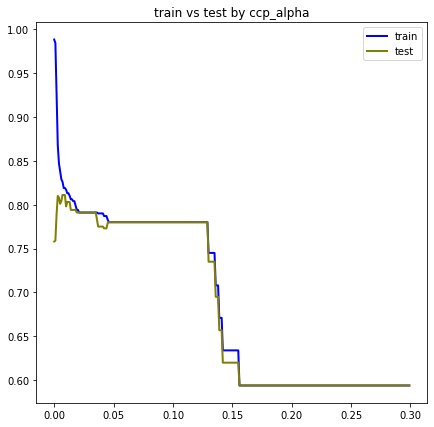

In [ ]:
plt.figure(figsize=(7,7))
plt.plot( 'param_ccp_alpha', 'mean_train_score', data=grid_search_df, marker='', color='blue', linewidth=2, label="train")
plt.plot( 'param_ccp_alpha', 'mean_test_score', data=grid_search_df, marker='', color='olive', linewidth=2, label="test")


plt.legend()
plt.title("train vs test by ccp_alpha")
plt.show()

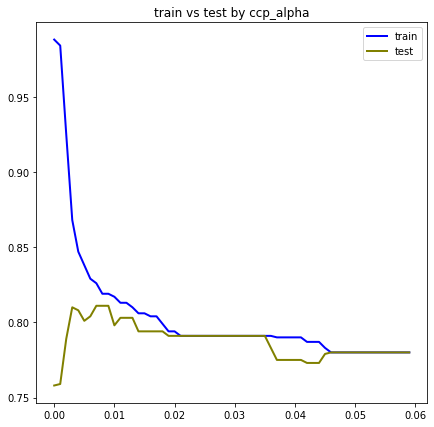

In [ ]:
plt.figure(figsize=(7,7))
plt.plot( 'param_ccp_alpha', 'mean_train_score', data=grid_search_df.head(60), marker='', color='blue', linewidth=2, label="train")
plt.plot( 'param_ccp_alpha', 'mean_test_score', data=grid_search_df.head(60), marker='', color='olive', linewidth=2, label="test")

plt.legend()
plt.title("train vs test by ccp_alpha")
plt.show()

visualize the grid search rank by C
in this case lower is better (rank 1 is the best rank)

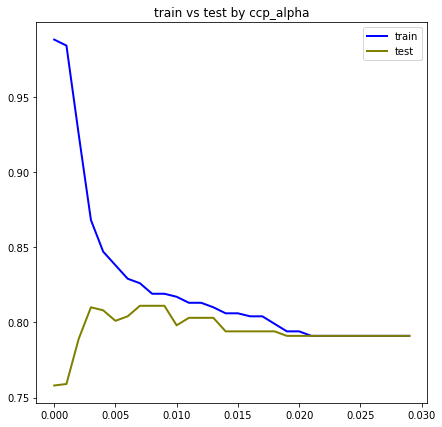

In [ ]:
plt.figure(figsize=(7,7))
plt.plot( 'param_ccp_alpha', 'mean_train_score', data=grid_search_df.head(30), marker='', color='blue', linewidth=2, label="train")
plt.plot( 'param_ccp_alpha', 'mean_test_score', data=grid_search_df.head(30), marker='', color='olive', linewidth=2, label="test")

plt.legend()
plt.title("train vs test by ccp_alpha")
plt.show()

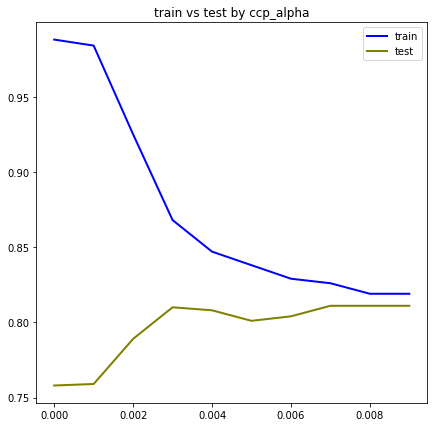

In [ ]:
plt.figure(figsize=(7,7))
plt.plot( 'param_ccp_alpha', 'mean_train_score', data=grid_search_df.head(10), marker='', color='blue', linewidth=2, label="train")
plt.plot( 'param_ccp_alpha', 'mean_test_score', data=grid_search_df.head(10), marker='', color='olive', linewidth=2, label="test")

plt.legend()
plt.title("train vs test by ccp_alpha")
plt.show()

this next section takes the difference by row, meaning is our model improving or declining in performance compared to how it did with a different ccp_alpa value. if the model improved we would see a negative value (ie ccp_alpha = 0.011 and .80 vs ccp_alpha = 0.012 and .82 then the difference would be -0.02 (an improvement of 2%. 

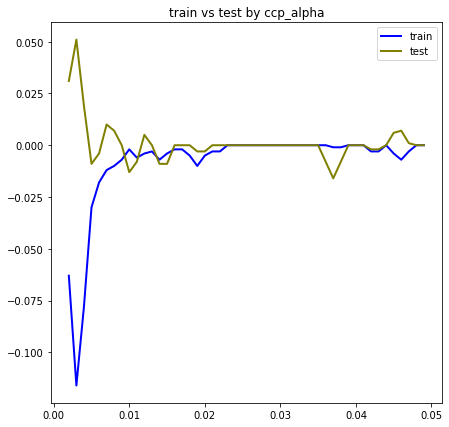

In [ ]:
difference = grid_search_df.diff(periods=2)
difference['param_ccp_alpha'] = grid_search_df['param_ccp_alpha'] # remove the diff

plt.figure(figsize=(7,7))
plt.plot( 'param_ccp_alpha', 'mean_train_score', data=difference.head(50), marker='', color='blue', linewidth=2, label="train")
plt.plot( 'param_ccp_alpha', 'mean_test_score', data=difference.head(50), marker='', color='olive', linewidth=2, label="test")

plt.legend()
plt.title("train vs test by ccp_alpha")
plt.show()


In [ ]:
difference.head(40)

,param_ccp_alpha,mean_test_score,mean_train_score,train_minus_test
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,0.002,0.031,-0.063,-0.093
3,0.002,0.051,-0.116,-0.167
4,0.002,0.019,-0.078,-0.098
5,0.002,-0.009,-0.030,-0.022
6,0.002,-0.004,-0.018,-0.014
7,0.002,0.010,-0.012,-0.021
8,0.002,0.007,-0.010,-0.017
9,0.002,0.000,-0.007,-0.007
